In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('troop_movements.csv')
df.head()

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld
0,2024-05-21 13:21:22,1,unknown,empire,10,3,6,6,Troiken
1,2024-05-21 13:21:21,2,x-wing,resistance,5,1,6,7,Trandosha
2,2024-05-21 13:21:20,3,tie_fighter,resistance,2,10,8,10,Stewjon
3,2024-05-21 13:21:19,4,stormtrooper,resistance,9,9,1,5,Sullust
4,2024-05-21 13:21:18,5,unknown,empire,4,2,9,2,Dagobah


In [8]:
# Create grouped data showing counts of empire vs resistance.
df_empire_or_resistance = df.groupby('empire_or_resistance').count()
df_empire_or_resistance

,timestamp,unit_id,unit_type,location_x,location_y,destination_x,destination_y,homeworld
empire_or_resistance,,,,,,,,
empire,483,483,483,483,483,483,483,483
resistance,517,517,517,517,517,517,517,517


In [9]:
df_homeworld = df.groupby(['homeworld']).count()
df_homeworld

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y
homeworld,,,,,,,,
Alderaan,24,24,24,24,24,24,24,24
Aleen Minor,20,20,20,20,20,20,20,20
Bestine IV,16,16,16,16,16,16,16,16
Cerea,33,33,33,33,33,33,33,33
Champala,20,20,20,20,20,20,20,20
Chandrila,28,28,28,28,28,28,28,28
Concord Dawn,28,28,28,28,28,28,28,28
Corellia,29,29,29,29,29,29,29,29
Dagobah,21,21,21,21,21,21,21,21


In [10]:
df_unit_type = df.groupby('unit_type').count()
df_unit_type

,timestamp,unit_id,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld
unit_type,,,,,,,,
at-at,127,127,127,127,127,127,127,127
at-st,134,134,134,134,134,134,134,134
resistance_soldier,134,134,134,134,134,134,134,134
stormtrooper,134,134,134,134,134,134,134,134
tie_fighter,120,120,120,120,120,120,120,120
tie_silencer,112,112,112,112,112,112,112,112
unknown,110,110,110,110,110,110,110,110
x-wing,129,129,129,129,129,129,129,129


In [11]:
df['is_resistance'] = df['empire_or_resistance'].apply(lambda x: True if x == "resistance" else False)
df.head()

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld,is_resistance
0,2024-05-21 13:21:22,1,unknown,empire,10,3,6,6,Troiken,False
1,2024-05-21 13:21:21,2,x-wing,resistance,5,1,6,7,Trandosha,True
2,2024-05-21 13:21:20,3,tie_fighter,resistance,2,10,8,10,Stewjon,True
3,2024-05-21 13:21:19,4,stormtrooper,resistance,9,9,1,5,Sullust,True
4,2024-05-21 13:21:18,5,unknown,empire,4,2,9,2,Dagobah,False


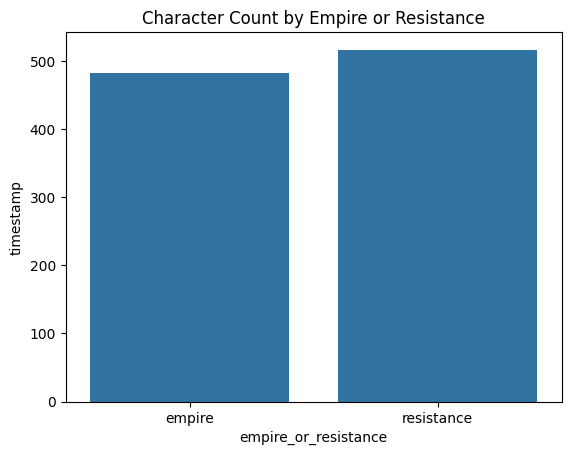

In [12]:
sns.barplot(x="empire_or_resistance", y="timestamp", data=df_empire_or_resistance)
plt.title("Character Count by Empire or Resistance")
plt.show()

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
X = df[['homeworld','unit_type']]
y = df['is_resistance']
X_encoded = pd.get_dummies(X)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [18]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

0.48


In [19]:
# Get feature importances
importances = model.feature_importances_

# Create a DataFrame to hold the feature importances
feature_importances = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': importances})

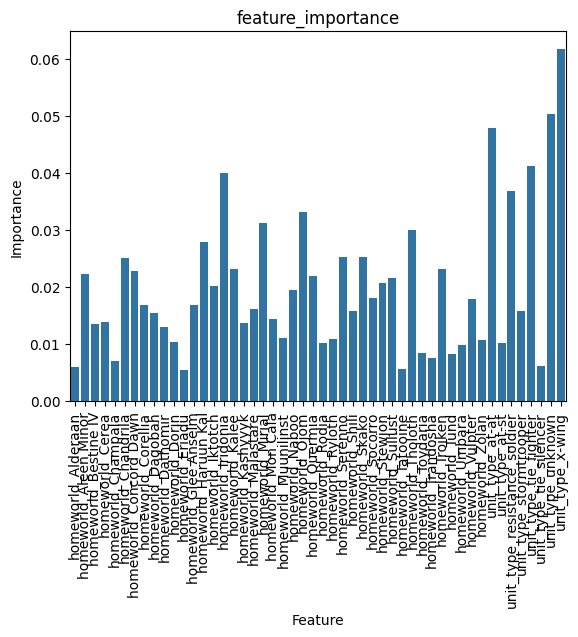

In [22]:
sns.barplot(x = 'Feature', y = 'Importance',data = feature_importances)
plt.title('feature_importance')
plt.xticks(rotation=90)
plt.show()

In [23]:
import pickle 
filename = "trained_model.pkl"
with open(filename, "wb") as file: # write binary
 pickle.dump(model, file) # model is dumped into the file